In [2]:
import glob
import os
os.chdir("/home/gridsan/qwang/urban-control/")
import numpy as np
import pandas as pd

In [ ]:
files = glob.glob("data/landuse_overlay/*_[0-9].csv")
filtered_files = glob.glob("data/landuse_overlay/*_filtered.csv")
d = {}
for f in files:
    if f.replace(".csv", "_filtered.csv") not in filtered_files:
        city, offset_right, offset_down = f.split('/')[-1].split('.')[0].split('_')

        df = pd.read_csv(f)

        landuse_cols = [c for c in df.columns if 'area_m2' in c]

        landuse_cols.append('parking')
        
        # calculate landuse cover
        df['total_landuse_cover'] = 0
        for c in landuse_cols:
            df['total_landuse_cover'] += df[c].fillna(0)
        df['total_landuse_cover'] += df['water'].fillna(0)
        
        # normalize if >1
        df.loc[df['total_landuse_cover']>1, landuse_cols] /= df['total_landuse_cover']
        
        # recalculate
        df['total_landuse_cover'] = 0
        for c in landuse_cols:
            df['total_landuse_cover'] += df[c].fillna(0)
        df['total_landuse_cover'] += df['water'].fillna(0)
        
        # Filter
        df = df[df['total_landuse_cover']>0.7]
        df['total_landuse_cover'] -= df['water'].fillna(0)
        df = df[df['total_landuse_cover']>0.3]

        
        landuse_building_cols = ['area_m2_commercial',
        'area_m2_industrial',
        'area_m2_recreational',
        'area_m2_residential']

        df['building_landuse_denominator'] = 0
        for c in landuse_building_cols:
            df['building_landuse_denominator'] += df[c].fillna(0)
        df['building_landuse_denominator'] = np.where(df['building_landuse_denominator']==0, np.nan, df['building_landuse_denominator'])

        df['building_density'] = df['tot_building_footprint']/df['building_landuse_denominator']
        df['building_density'] = np.where(df['building_density'] <= 1, df['building_density'], np.nan)
        
        if 'city' not in d.keys():
            d[city] = df['building_density'].dropna().tolist()
        else:
            d[city].append(df['building_density'].dropna().tolist())
            
        df.to_csv(f"data/landuse_overlay/{city}_{offset_right}_{offset_down}_filtered.csv", index=False)

        print(city, offset_right, offset_down, len(df))
        

(array([3.559e+03, 1.256e+03, 1.003e+03, 8.050e+02, 5.960e+02, 5.390e+02,
        4.400e+02, 3.520e+02, 1.700e+02, 7.500e+01, 2.700e+01, 2.300e+01,
        1.600e+01, 8.000e+00, 8.000e+00, 3.000e+00, 3.000e+00, 3.000e+00,
        2.000e+00, 2.000e+00]),
 array([0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 ,
        0.55, 0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95, 1.  ]),
 <BarContainer object of 20 artists>)

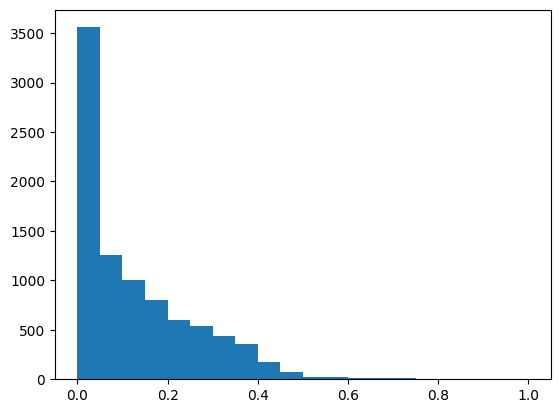

In [6]:
import matplotlib.pyplot as plt
plt.hist(d['chicago'], bins=np.linspace(0,1,21))

(array([6.810e+02, 5.870e+02, 8.230e+02, 1.785e+03, 2.438e+03, 1.280e+03,
        3.860e+02, 1.630e+02, 8.500e+01, 4.300e+01, 1.800e+01, 9.000e+00,
        5.000e+00, 2.000e+00, 1.000e+00, 4.000e+00, 1.000e+00, 1.000e+00,
        1.000e+00, 0.000e+00]),
 array([0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 ,
        0.55, 0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95, 1.  ]),
 <BarContainer object of 20 artists>)

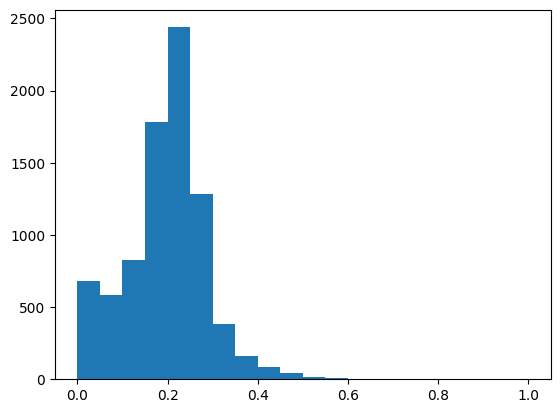

In [7]:
plt.hist(d['dallas'], bins=np.linspace(0,1,21))

(array([1.650e+02, 1.050e+02, 3.040e+02, 8.780e+02, 1.926e+03, 2.809e+03,
        1.532e+03, 6.340e+02, 2.940e+02, 1.260e+02, 4.500e+01, 2.400e+01,
        5.000e+00, 5.000e+00, 3.000e+00, 2.000e+00, 1.000e+00, 3.000e+00,
        1.000e+00, 1.000e+00]),
 array([0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 ,
        0.55, 0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95, 1.  ]),
 <BarContainer object of 20 artists>)

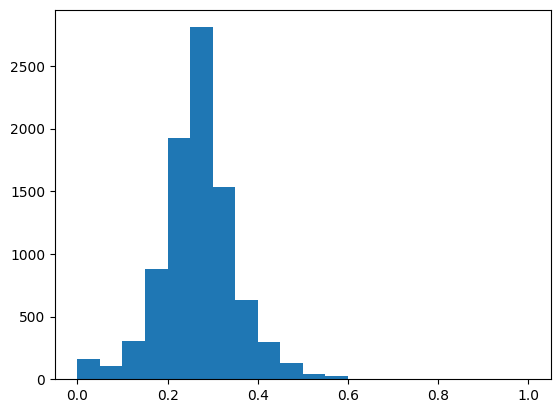

In [8]:
plt.hist(d['la'], bins=np.linspace(0,1,21))